# Calculating a Zero Beta Portfolio #

### First Approach: Five Stocks ###

In [14]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Statistics
import statsmodels.api as sm

# Pretty Notation
from IPython.display import display, Math

In [16]:
def import_financial_data(
    ticker: str
):

    # Check the ticker for Upper Cases
    ticker = ticker if ticker.isupper() else ticker.upper()

    # Import data
    df = pd.read_csv(rf"..\stocks\{ticker}.csv")

    # Set the Index
    df = df.set_index('Date')
    df.index = pd.to_datetime(df.index)

    df_useful_data = df[['Open Price', 'High Price', 'Low Price', 'Close Price', 'Adjusted_close']]

    df_useful_data = df_useful_data.rename(columns={
        "Open Price":"open",
        "High Price":"high",
        "Low Price":"low",
        "Close Price":"close",
        "Adjusted_close":"adjusted_close",
    })

    # Drop NaN's
    df_useful_data.dropna(inplace = True)

    return df_useful_data.loc["2015-01-01":]

In [18]:
# Get the important data for the Risk Free Rate

rfr = pd.read_csv(rf"..\additional_data\rfr.csv")
rfr = rfr.set_index('Date')
rfr.index = pd.to_datetime(rfr.index, dayfirst=True)
rfr.dropna(inplace = True)

rfr

,risk_free_rate
Date,
2015-01-02,2.12
2015-01-05,2.04
2015-01-06,1.97
2015-01-07,1.96
2015-01-08,2.03
...,...
2025-02-13,4.52
2025-02-14,4.47
2025-02-18,4.55


In [20]:
# Get the important data for the S&P500

sp500 = pd.read_csv(rf"..\additional_data\sp500.csv")
sp500 = sp500.set_index('Date')
sp500.index = pd.to_datetime(sp500.index, dayfirst=True)

sp500

,sp_500
Date,
2015-02-23,2109.66
2015-02-24,2115.48
2015-02-25,2113.86
2015-02-26,2110.74
2015-02-27,2104.50
...,...
2025-02-14,6114.63
2025-02-18,6129.58
2025-02-19,6144.15


In [22]:
# Get the important data for the S&P500

betas_df = pd.read_csv(rf"..\additional_data\betas.csv")
betas_df = betas_df.set_index('Date')
betas_df.index = pd.to_datetime(betas_df.index)

betas_df

,A,AAPL,ABBV,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WST,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-26,1.152338,1.166591,0.939661,1.107909,1.171802,1.195408,1.118394,1.022190,1.249073,0.500243,...,0.774610,1.074109,1.721360,0.452539,1.016533,0.972569,1.059763,0.807060,1.560041,0.972071
2016-02-29,1.152037,1.166537,0.939727,1.107902,1.172187,1.194066,1.117375,1.022437,1.245565,0.503666,...,0.773613,1.073822,1.721667,0.454845,1.016626,0.972044,1.058855,0.806179,1.559724,0.973369
2016-03-01,1.150741,1.162678,0.947581,1.112593,1.175925,1.193401,1.110462,1.024013,1.236025,0.497681,...,0.777704,1.062449,1.713627,0.450288,1.021999,0.972575,1.048272,0.806323,1.535979,0.983824
2016-03-02,1.158599,1.180528,0.960185,1.097906,1.188461,1.198640,1.095517,1.023562,1.263279,0.479161,...,0.785904,1.064054,1.690229,0.431224,1.007240,0.958904,1.084445,0.788765,1.511657,0.987076
2016-03-03,1.160238,1.179626,0.956580,1.096988,1.187307,1.200510,1.097509,1.019410,1.264678,0.478531,...,0.785601,1.067161,1.689917,0.431229,1.010486,0.958354,1.081805,0.788025,1.520338,0.983627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-22,0.876024,1.037784,0.194117,0.161045,1.152206,1.811338,0.440483,0.369979,1.321824,0.050615,...,0.659141,0.629752,0.945839,0.030221,0.178952,1.048215,0.402962,0.558584,1.298215,0.644560
2024-10-23,0.885035,1.040036,0.185126,0.162425,1.155704,1.812296,0.440543,0.368008,1.320912,0.048643,...,0.657085,0.631516,0.950898,0.028141,0.178515,1.057987,0.403819,0.558006,1.297213,0.643500
2024-10-24,0.882042,1.054079,0.192155,0.158307,1.156394,1.783466,0.423049,0.364567,1.315634,0.022643,...,0.645428,0.618673,0.963019,0.010037,0.175144,1.046622,0.393233,0.547804,1.299909,0.640561


In [24]:
# Import Data

# Apple Data
df_1 = import_financial_data('AAPL')

# Amazon Data
df_2 = import_financial_data('AMZN')

# Meta Data
df_3 = import_financial_data('META')

# Microsoft Data
df_4 = import_financial_data('MSFT')

# Nvidia Data
df_5 = import_financial_data('NVDA')


In [26]:
# Let us calculate the Betas for some stocks

# Apple
apple_beta = betas_df['AAPL']

# Amazon
amazon_beta = betas_df['AMZN']

# META
meta_beta = betas_df['META']

# Microsoft
microsoft_beta = betas_df['MSFT']

# NVDIA
nvdia_beta = betas_df['NVDA']

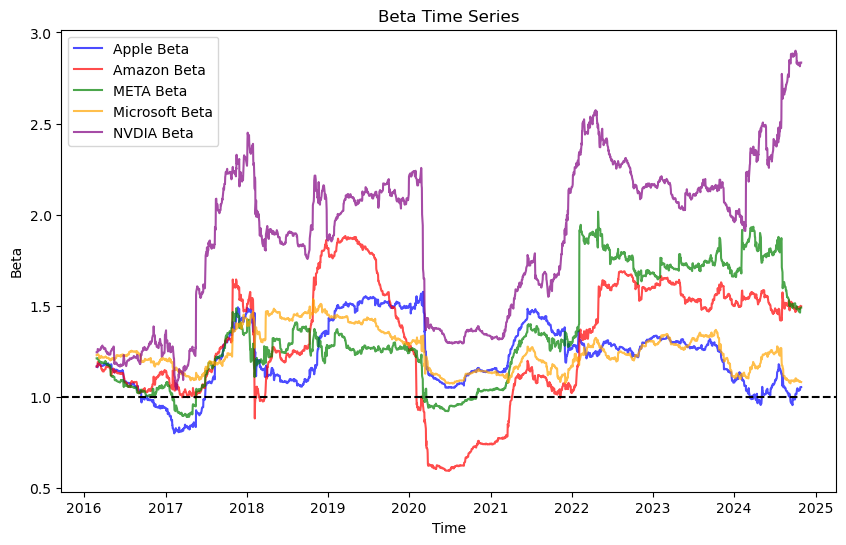

In [30]:
# Create Plot

plt.figure(figsize=(10, 6))
plt.plot(apple_beta, label='Apple Beta', color='blue', alpha=0.7)
plt.plot(amazon_beta, label='Amazon Beta', color='red', alpha=0.7)
plt.plot(meta_beta, label='META Beta', color='green', alpha=0.7)
plt.plot(microsoft_beta, label='Microsoft Beta', color='orange', alpha=0.7)
plt.plot(nvdia_beta, label='NVDIA Beta', color='purple', alpha=0.7)
plt.axhline(y=1, color='black', linestyle='dashed')

# Config
plt.title('Beta Time Series')
plt.xlabel('Time')
plt.ylabel('Beta')
plt.legend()

# Show
plt.show()

In [32]:
# Let us find an unsensible portfolio to the market

data_portfolio = pd.DataFrame()

data_portfolio['AAPL'] = df_1['adjusted_close']
data_portfolio['AMZN'] = df_2['adjusted_close']
data_portfolio['META'] = df_3['adjusted_close']
data_portfolio['MSFT'] = df_4['adjusted_close']
data_portfolio['NVDA'] = df_5['adjusted_close']

data_portfolio = data_portfolio.dropna()

data_portfolio = data_portfolio.loc['2016-01-01':]

data_portfolio

,AAPL,AMZN,META,MSFT,NVDA
Date,,,,,
2016-01-04,26.3375,31.8495,102.22,54.80,0.80925
2016-01-05,25.6775,31.6895,102.73,55.05,0.82225
2016-01-06,25.1750,31.6325,102.97,54.05,0.78825
2016-01-07,24.1125,30.3970,97.92,52.17,0.75700
2016-01-08,24.2400,30.3525,97.33,52.33,0.74075
...,...,...,...,...,...
2024-10-22,235.8600,189.7000,582.01,427.51,143.59000
2024-10-23,230.7600,184.7100,563.69,424.60,139.56000
2024-10-24,230.5700,186.3800,567.78,424.73,140.41000


In [34]:
# Returns

df_returns = data_portfolio.pct_change(1).dropna().mul(100)

df_returns

,AAPL,AMZN,META,MSFT,NVDA
Date,,,,,
2016-01-05,-2.505933,-0.502363,0.498924,0.456204,1.606426
2016-01-06,-1.956966,-0.179870,0.233622,-1.816530,-4.134995
2016-01-07,-4.220457,-3.905793,-4.904341,-3.478261,-3.964478
2016-01-08,0.528771,-0.146396,-0.602533,0.306690,-2.146631
2016-01-11,1.619224,1.760975,0.184938,-0.057328,0.168748
...,...,...,...,...,...
2024-10-22,-0.262179,0.333210,1.190973,2.084627,-0.083501
2024-10-23,-2.162300,-2.630469,-3.147712,-0.680686,-2.806602
2024-10-24,-0.082337,0.904120,0.725576,0.030617,0.609057


In [36]:
# Common Index

common_index = df_returns.index.intersection(betas_df.index)  # Common DATE
df_returns = df_returns.reindex(common_index)
betas_df = betas_df.reindex(common_index)

In [38]:
# We have to find the mean expected returns

expected_returns = df_returns.mean()

expected_returns

AAPL    0.115555
AMZN    0.107535
META    0.106006
MSFT    0.109616
NVDA    0.271975
dtype: float64

In [40]:
# We have to also find the standard deviations

volat = df_returns.dropna().std()

volat

AAPL    1.805440
AMZN    2.028301
META    2.426095
MSFT    1.702180
NVDA    3.098672
dtype: float64

In [42]:
# Also we have to find the covariance matrix

cov_matrix = df_returns.dropna().cov()

cov_matrix

,AAPL,AMZN,META,MSFT,NVDA
AAPL,3.259615,2.135601,2.316285,2.150639,3.159645
AMZN,2.135601,4.114004,2.943271,2.349912,3.484594
META,2.316285,2.943271,5.885938,2.453915,3.798201
MSFT,2.150639,2.349912,2.453915,2.897416,3.314268
NVDA,3.159645,3.484594,3.798201,3.314268,9.601769


In [46]:
# We need also to find the mean betas of the stocks

sample_beta_df = pd.DataFrame()

sample_beta_df['AAPL'] = apple_beta
sample_beta_df['AMZN'] = amazon_beta
sample_beta_df['META'] = meta_beta
sample_beta_df['MSFT'] = microsoft_beta
sample_beta_df['NVDA'] = nvdia_beta

mean_betas = sample_beta_df.mean()

mean_betas

AAPL    1.218297
AMZN    1.293290
META    1.357656
MSFT    1.252611
NVDA    1.882897
dtype: float64

In [242]:
# Which is the form of the portfolio weights if we want a zero-beta portfolio

display(Math(r"\omega=\left(\frac{D}{DC-E^2}\right)\Sigma^{-1}\iota+\left(\frac{E}{DC-E^2}\right)\Sigma^{-1}\beta"))
display(Math(r"C = \iota^⊤\Sigma^{-1}\iota"))
display(Math(r"D = \beta^⊤\Sigma^{-1}\beta"))
display(Math(r"E = \beta^⊤\Sigma^{-1}\iota"))
display(Math(r"\Delta = DC-E^2"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [48]:
# So let us obtain the components

beta = mean_betas.values.flatten().reshape(-1, 1)
Sigma = cov_matrix.values

lambda_ = 1e-6  # Tikhonov Regularization
Sigma_inv = np.linalg.inv(Sigma + lambda_ * np.eye(Sigma.shape[0]))

iota = np.ones((5, 1))

In [50]:
# And now obtain the coefficients of the Efficient Frontier

C = np.dot(np.dot(iota.T, Sigma_inv), iota)
D = np.dot(np.dot(beta.T, Sigma_inv), beta)
E = np.dot(np.dot(beta.T, Sigma_inv), iota)
Delta = (D*C - E*E)

print(f"This is C: {C}")
print(f"This is D: {D}")
print(f"This is E: {E}")
print(f"This is Delta: {Delta}")

This is C: [[0.40962101]]
This is D: [[0.6287587]]
This is E: [[0.47691236]]
This is Delta: [[0.03010738]]


In [52]:
# Now the weights

beta_weights = ((D/Delta)*(Sigma_inv @ iota)) - ((E/Delta)*(Sigma_inv @ beta))

beta_weights

array([[ 1.25957447],
       [ 0.32658001],
       [-0.14169061],
       [ 1.47179689],
       [-1.91626076]])

In [54]:
# Create the portfolio

df_returns["zero_beta"] = df_returns.iloc[:, :5] @ beta_weights

df_returns

,AAPL,AMZN,META,MSFT,NVDA,zero_beta
Date,,,,,,
2016-02-26,0.155023,0.014411,-0.138799,-1.535509,-0.658514,-0.778438
2016-02-29,-0.227015,-0.488086,-0.926612,-0.818713,-1.010101,0.416588
2016-03-01,3.971455,4.799826,2.712308,3.341195,4.432398,2.609492
2016-03-02,0.218840,0.202059,0.118376,0.703690,0.580153,0.248825
2016-03-03,0.744417,-0.468796,-0.336517,-1.133144,-0.880389,0.851526
...,...,...,...,...,...,...
2024-10-22,-0.262179,0.333210,1.190973,2.084627,-0.083501,2.837994
2024-10-23,-2.162300,-2.630469,-3.147712,-0.680686,-2.806602,1.239715
2024-10-24,-0.082337,0.904120,0.725576,0.030617,0.609057,-1.033299


In [56]:
df_returns["risk_free_rate"] = (((1 + (rfr.div(100)))**(1/360)) - 1).mul(100)
df_returns['market_returns'] = sp500.pct_change(1).mul(100)

df_returns

,AAPL,AMZN,META,MSFT,NVDA,zero_beta,risk_free_rate,market_returns
Date,,,,,,,,
2016-02-26,0.155023,0.014411,-0.138799,-1.535509,-0.658514,-0.778438,0.004846,-0.187016
2016-02-29,-0.227015,-0.488086,-0.926612,-0.818713,-1.010101,0.416588,0.004792,-0.812094
2016-03-01,3.971455,4.799826,2.712308,3.341195,4.432398,2.609492,0.005038,2.386879
2016-03-02,0.218840,0.202059,0.118376,0.703690,0.580153,0.248825,0.005065,0.409432
2016-03-03,0.744417,-0.468796,-0.336517,-1.133144,-0.880389,0.851526,0.005038,0.349870
...,...,...,...,...,...,...,...,...
2024-10-22,-0.262179,0.333210,1.190973,2.084627,-0.083501,2.837994,0.011429,-0.047489
2024-10-23,-2.162300,-2.630469,-3.147712,-0.680686,-2.806602,1.239715,0.011536,-0.919128
2024-10-24,-0.082337,0.904120,0.725576,0.030617,0.609057,-1.033299,0.011456,0.214578


In [58]:
# Create the excess returns

df_returns['portfolio_excess'] = df_returns['zero_beta'] - df_returns['risk_free_rate']
df_returns['market_excess'] = df_returns['market_returns'] - df_returns['risk_free_rate']

df_returns

,AAPL,AMZN,META,MSFT,NVDA,zero_beta,risk_free_rate,market_returns,portfolio_excess,market_excess
Date,,,,,,,,,,
2016-02-26,0.155023,0.014411,-0.138799,-1.535509,-0.658514,-0.778438,0.004846,-0.187016,-0.783284,-0.191863
2016-02-29,-0.227015,-0.488086,-0.926612,-0.818713,-1.010101,0.416588,0.004792,-0.812094,0.411796,-0.816886
2016-03-01,3.971455,4.799826,2.712308,3.341195,4.432398,2.609492,0.005038,2.386879,2.604455,2.381842
2016-03-02,0.218840,0.202059,0.118376,0.703690,0.580153,0.248825,0.005065,0.409432,0.243761,0.404367
2016-03-03,0.744417,-0.468796,-0.336517,-1.133144,-0.880389,0.851526,0.005038,0.349870,0.846488,0.344833
...,...,...,...,...,...,...,...,...,...,...
2024-10-22,-0.262179,0.333210,1.190973,2.084627,-0.083501,2.837994,0.011429,-0.047489,2.826565,-0.058918
2024-10-23,-2.162300,-2.630469,-3.147712,-0.680686,-2.806602,1.239715,0.011536,-0.919128,1.228180,-0.930663
2024-10-24,-0.082337,0.904120,0.725576,0.030617,0.609057,-1.033299,0.011456,0.214578,-1.044755,0.203123


In [60]:
# Calculate the beta with the weights

zero_beta_alt = mean_betas.transpose().dot(beta_weights)

print(zero_beta_alt.round(4))

[-0.]


In [62]:
def calculate_analytics(df_returns, risk_free_rate=0.0):
    # Trading Days in one Year
    ann_factor = 252  
    
    # Annualized Returns
    annualized_return = df_returns.mean() * ann_factor
    
    # Annualized Volatility
    annualized_std = df_returns.std() * np.sqrt(ann_factor)
    
    # Sharpe Ratio
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std
    
    # Max Drawdown
    cumulative_returns = (1 + df_returns.div(100)).cumprod()
    rolling_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns / rolling_max) - 1
    max_drawdown = drawdown.min()

    # VaR at 95%
    var_95 = df_returns.quantile(0.05)

    # Create DF
    summary_df = pd.DataFrame({
        "Annualized Returns": annualized_return,
        "Annualized Volatility": annualized_std,
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_drawdown,
        "VaR 95%": var_95
    })
    
    return summary_df

In [64]:
# Create a DataFrame

tickers = ["AAPL", "AMZN", "META", "MSFT", "NVDA", "zero_beta"]

df_portfolios = df_returns[tickers]

df_portfolios

,AAPL,AMZN,META,MSFT,NVDA,zero_beta
Date,,,,,,
2016-02-26,0.155023,0.014411,-0.138799,-1.535509,-0.658514,-0.778438
2016-02-29,-0.227015,-0.488086,-0.926612,-0.818713,-1.010101,0.416588
2016-03-01,3.971455,4.799826,2.712308,3.341195,4.432398,2.609492
2016-03-02,0.218840,0.202059,0.118376,0.703690,0.580153,0.248825
2016-03-03,0.744417,-0.468796,-0.336517,-1.133144,-0.880389,0.851526
...,...,...,...,...,...,...
2024-10-22,-0.262179,0.333210,1.190973,2.084627,-0.083501,2.837994
2024-10-23,-2.162300,-2.630469,-3.147712,-0.680686,-2.806602,1.239715
2024-10-24,-0.082337,0.904120,0.725576,0.030617,0.609057,-1.033299


In [66]:
# And the Table

analytics_table = calculate_analytics(df_portfolios)

analytics_table

,Annualized Returns,Annualized Volatility,Sharpe Ratio,Max Drawdown,VaR 95%
AAPL,29.119960,28.660477,1.016032,-0.353296,-2.710602
AMZN,27.098852,32.198277,0.841624,-0.579995,-3.061214
META,26.713450,38.513066,0.693620,-0.764744,-3.421726
MSFT,27.623235,27.021266,1.022278,-0.361973,-2.634798
NVDA,68.537733,49.189896,1.393330,-0.651918,-4.560855
zero_beta,-48.936720,72.544704,-0.674573,-0.998823,-7.409569


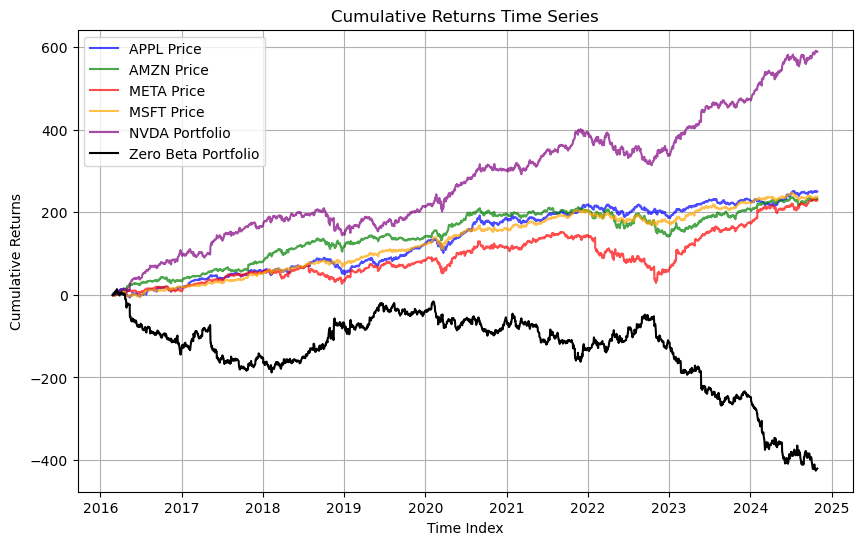

In [68]:
# Time Series Graphs
plt.figure(figsize=(10, 6))
plt.plot(df_returns['AAPL'].cumsum(), label='APPL Price', color='blue', alpha=0.7)
plt.plot(df_returns['AMZN'].cumsum(), label='AMZN Price', color='green', alpha=0.7)
plt.plot(df_returns['META'].cumsum(), label='META Price', color='red', alpha=0.7)
plt.plot(df_returns['MSFT'].cumsum(), label='MSFT Price', color='orange', alpha=0.7)
plt.plot(df_returns['NVDA'].cumsum(), label='NVDA Portfolio', color='purple', alpha=0.7)
plt.plot(df_returns['zero_beta'].cumsum(), label='Zero Beta Portfolio', color='black', alpha=1)

# Config
plt.title('Cumulative Returns Time Series')
plt.xlabel('Time Index')
plt.ylabel('Cumulative Returns')
plt.legend()

# Show
plt.grid(True)
plt.show()

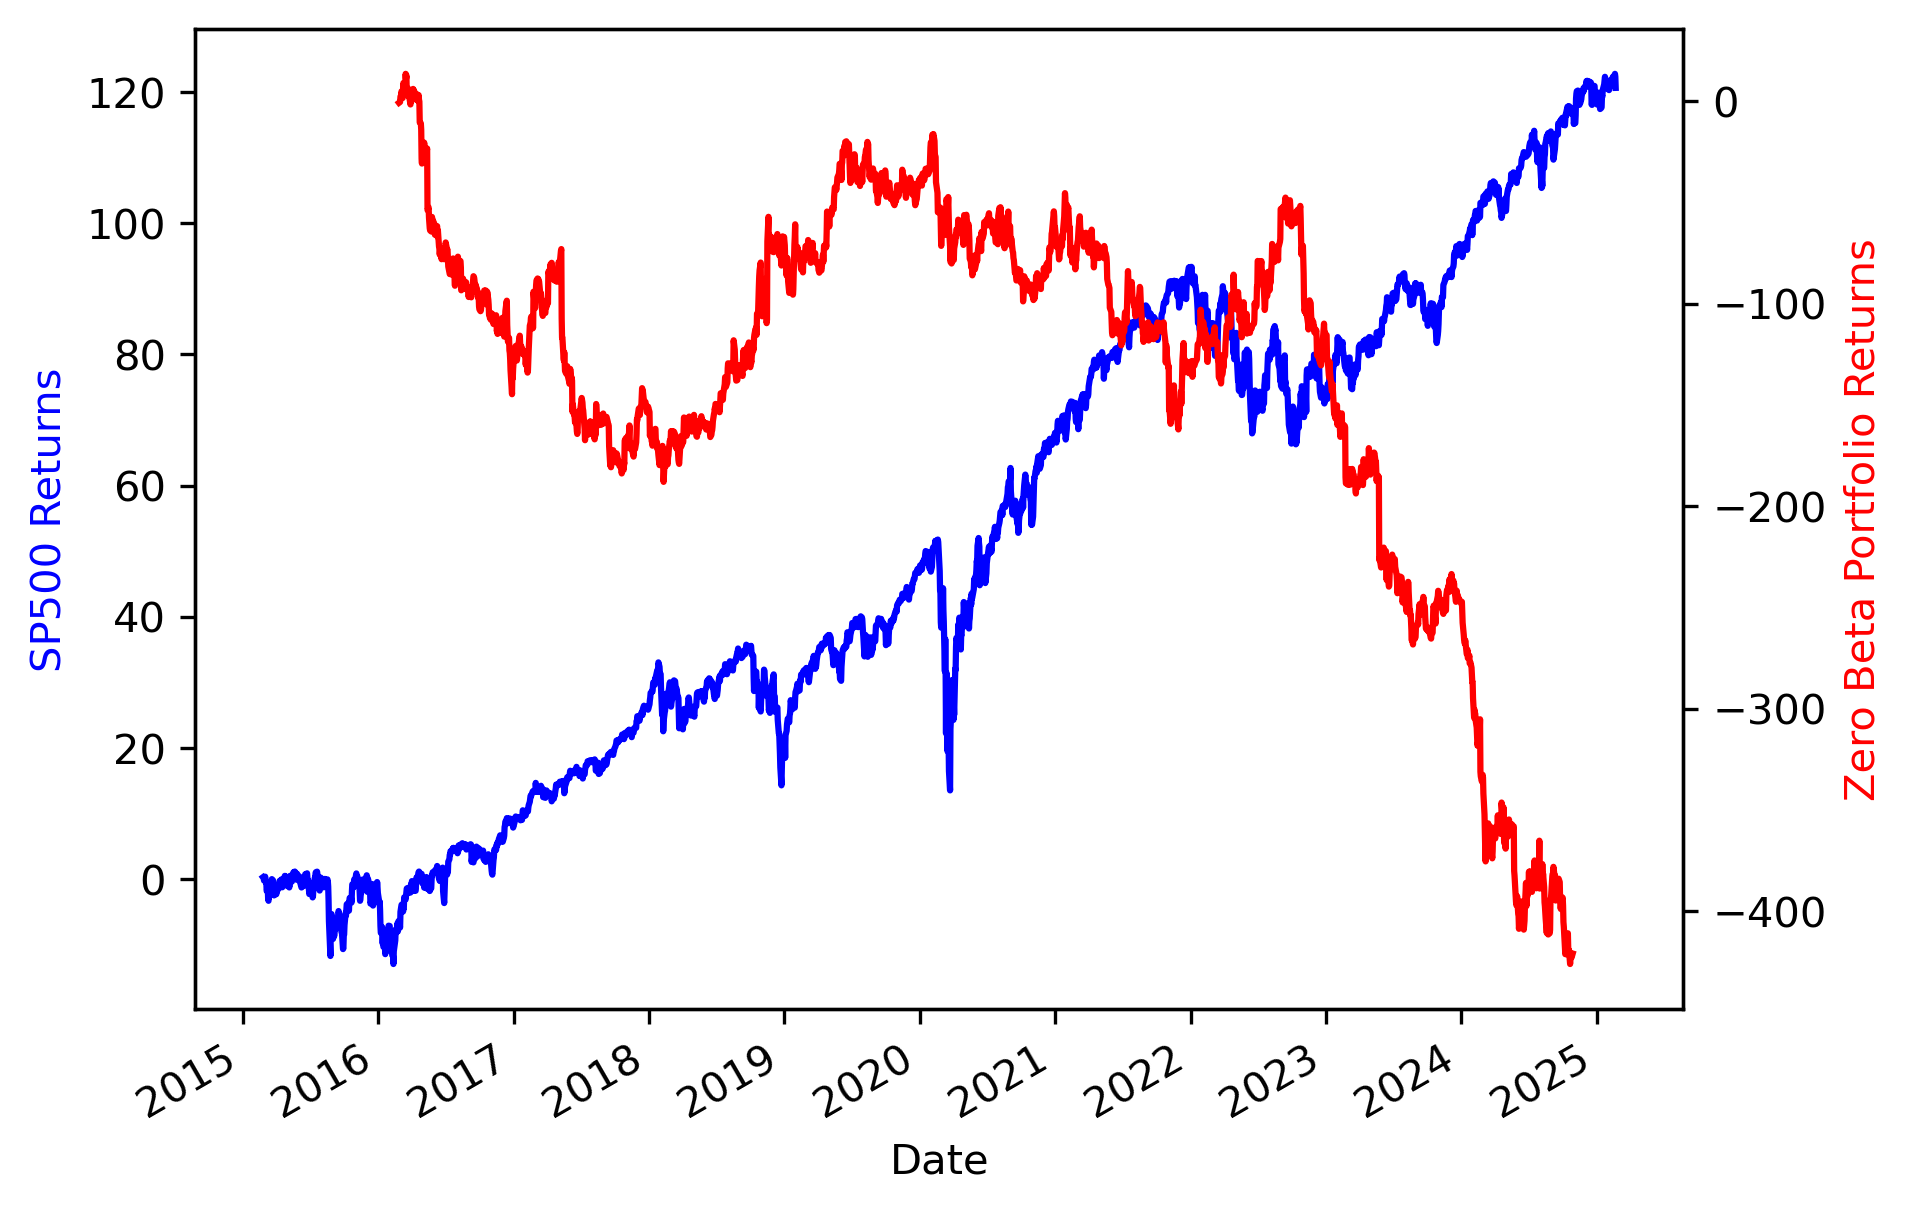

In [70]:
# Create Figure
fig, ax1 = plt.subplots(dpi = 300)

# SP500 Returns
sp500['sp_500'].pct_change(1).mul(100).cumsum().plot(color = 'blue', ax = ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel(
    'SP500 Returns', 
    color='blue'
    )

# Zero Beta Portfolio Returns
ax2 = ax1.twinx()

df_returns['zero_beta'].cumsum().plot(color = 'red', ax = ax2)
ax2.set_ylabel(
    'Zero Beta Portfolio Returns', 
    color='red'
    )

plt.show()

In [76]:
# Create the Weights function
def wexp(N, half_life):
    c = np.log(0.5)/half_life
    n = np.array(range(N))
    w = np.exp(c*n)
    return np.flip(w/np.sum(w))

In [78]:
# Calculate the beta

window = len(df_returns)
weights = window * wexp(window, window/2)

#Model specification
model = sm.WLS(
    df_returns['portfolio_excess'], 
    sm.add_constant(df_returns['market_excess']),
    weights = weights,
    missing='drop'
    )   
     
#the results of the model
results = model.fit() 
    
#here we check the summary
print(results.summary())       

                            WLS Regression Results                            
Dep. Variable:       portfolio_excess   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.557
Date:                Fri, 28 Mar 2025   Prob (F-statistic):              0.212
Time:                        23:16:51   Log-Likelihood:                -6527.2
No. Observations:                2168   AIC:                         1.306e+04
Df Residuals:                    2166   BIC:                         1.307e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2586      0.102     -2.546